# NI-VSM Domácí úkol 2

### Jakub Kučera - kucerj56

In [1]:
K = 11
L = 6
X = 19  # ((K*L*23) % 20) + 1
Y = 2  # ((X + ((K*5 + L*7) % 19)) % 20) + 1
file_1_path = "hw1-source/019.txt"
file_2_path = "hw1-source/002.txt"

In [2]:
from collections import Counter
import math
import matplotlib.pylab as plt
import matplotlib.ticker as mtick
import numpy as np
import scipy.stats as st

### 1. (1b) Z obou datových souborů načtěte texty k analýze. Pro každý text zvlášť odhadněte základní charakteristiky délek slov, tj. střední hodnotu a rozptyl. Graficky znázorněte rozdělení délek slov.

Kod pro nacteni textu zkopiruji z 1. ukolu

In [3]:
def load_text(filename: str) -> str:
    with open(filename) as f1:
        file_contents = f1.read()
    # separate the first line with the book info from rest of the text
    info, text = file_contents.split('\n')
    return text

In [4]:
def calc_words_lenghts(text: str):
    # Split the text into a list of separate characters
    list_of_words = text.split(' ')
    
    # calculate the lenghts of words
    word_lenghts = {}
    for w in list_of_words:
        word_lenghts[w] = len(w)
    return word_lenghts

In [5]:
# load both text files and calculate word lenghts
text_1 = load_text(file_1_path)
text_1_word_lens = calc_words_lenghts(text_1)

text_2 = load_text(file_2_path)
text_2_word_lens = calc_words_lenghts(text_2)

Pro odhad stredni hodnoty a rozptylu pouziju vyberovy prumer a vyberovy rozptyl

![title](vyberovy_prumer_rozptyl.png)

<!-- Xn(X) = $1/n \sum_{x∈X} Xi$  . -->

In [6]:
# def calc_word_len_avg(word_lens: dict[str, int]):
#     len_sum = 0
#     for w, l in word_lens.items():
#         len_sum += l
#     return len_sum / len(word_lens)

In [7]:
def calc_word_len_sample_var(word_lens: dict[str, int], sample_avg: float):
    return sum((np.array(list(word_lens.values()))-sample_avg)**2)/(len(word_lens)-1)

In [8]:
text_1_Xn = sum(text_1_word_lens.values())/len(text_1_word_lens)
# text_1_sn2 = sum((np.array(list(text_1_word_lens.values()))-text_1_Xn)**2)/(len(text_1_word_lens)-1)
text_1_sn2 = calc_word_len_sample_var(text_1_word_lens, text_1_Xn)
print(f"Text 1: Xn={text_1_Xn}, sn^2={text_1_sn2}")


text_2_Xn = sum(text_2_word_lens.values())/len(text_2_word_lens)
# text_1_sn2 = sum((np.array(list(text_1_word_lens.values()))-text_1_Xn)**2)/(len(text_1_word_lens)-1)
text_2_sn2 = calc_word_len_sample_var(text_2_word_lens, text_2_Xn)
print(f"Text 2: Xn={text_2_Xn}, sn^2={text_2_sn2}")


Text 1: Xn=6.213610586011342, sn^2=6.422087128372603
Text 2: Xn=5.115384615384615, sn^2=4.151938970120794


In [9]:
def plot_word_lens(word_lens: dict[str, int], name: str):
    fig, ax = plt.subplots()
    ax.hist(sorted(word_lens.values()))
    plt.xlabel("Word lenght")
    plt.ylabel("Number of occurences")
    plt.title(name)
    plt.show()

Histogram znazornujici distribuci delky slov

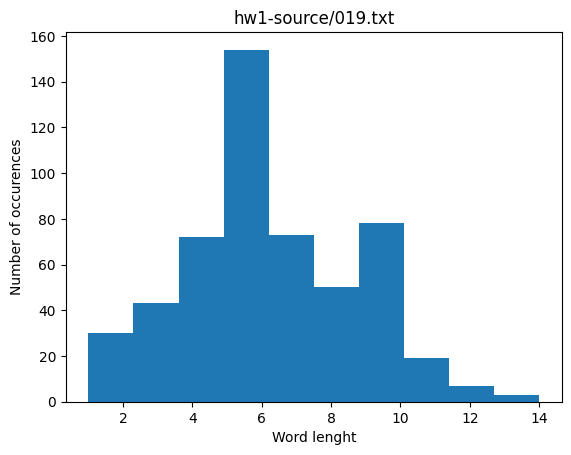

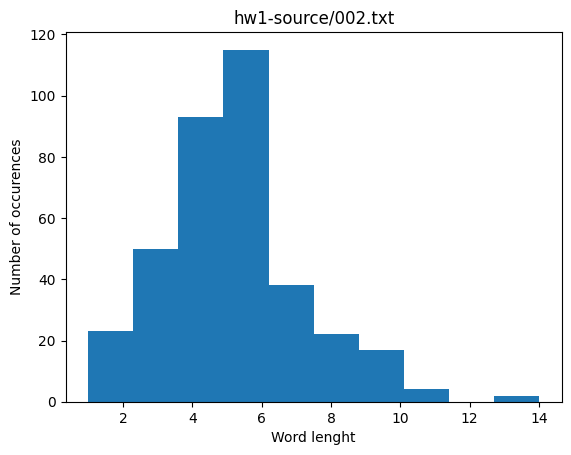

In [10]:
plot_word_lens(text_1_word_lens, file_1_path)
plot_word_lens(text_2_word_lens, file_2_path)

### 2. (1b) Pro každý text zvlášť odhadněte pravděpodobnosti písmen (symbolů mimo mezery), které se v textech vyskytují. Výsledné pravděpodobnosti graficky znázorněte.

Pro tento ukol zkopiruji kod z 1. ukolu. Jedine zmeny jsou, ze odstranim mezeru ze znaku a do grafu pridam vertikalni cary pro lepsi predhlednost.

In [11]:
# Calculate the probabilities of seperate characters.
# ! the space is excluded this time 
def calc_char_probabilities(text: str):
    # delete space
    text = text.replace(' ', '')
    # Split the text into a list of separate characters
    list_of_characters = [*text]
    total_characters_count = len(list_of_characters)
    # get number of occurrences for each character
    char_counter = Counter(list_of_characters)

    # calculate probabilities of occurrences of characters
    char_probabilities = {}
    for c, n in sorted(char_counter.items()):
        char_probabilities[c] = n/total_characters_count
    # display(char_probabilities)
    return char_probabilities

In [12]:
def plot_char_probs(char_probabilities: dict[str, float], name: str):
    # add date to plot
    fig, ax = plt.subplots()
    ax.stem(char_probabilities.keys(), char_probabilities.values())
    # plt.scatter(char_probabilities.keys(), char_probabilities.values(), marker='|')
    # set Y axis to be in percentages
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

    plt.xlabel("Characters")
    plt.ylabel("Probability of occurence")
    plt.title(name)
    # plt.plot(marker='.',  linewidth=10)
    plt.show()

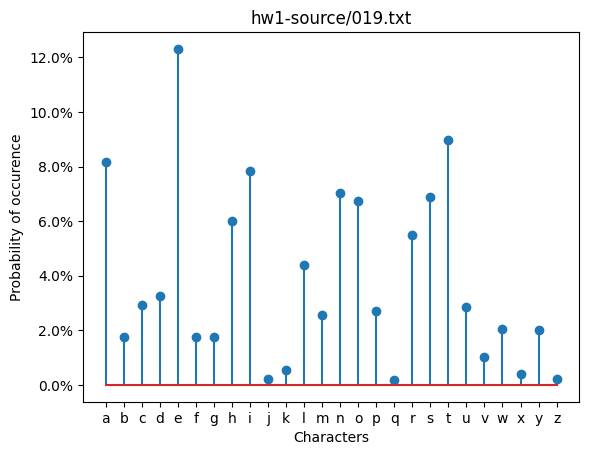

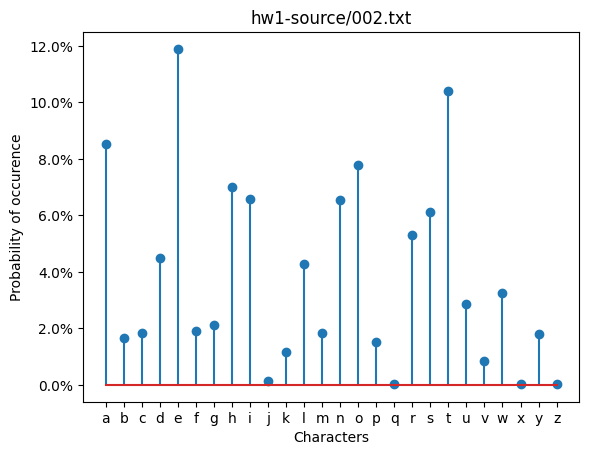

In [13]:
file_1_chars_prob = calc_char_probabilities(text_1)
# display(file_1_chars_prob)
plot_char_probs(file_1_chars_prob, file_1_path)

file_2_chars_prob = calc_char_probabilities(text_2)
# display(file_2_chars_prob)
plot_char_probs(file_2_chars_prob, file_2_path)

### 3. (1.5b) Na hladině významnosti 5% otestujte hypotézu, že rozdělení délek slov nezávisí na tom, o který jde text. Určete také p-hodnotu testu.

Zadani si prevedu do kontingencni tabulky, kde ve sloupcich budou delky slov a v radcich budou texty.

K tomu si ale nejprve vytvorim seznam delek slov a jejich cetnosti. Musim vzit v potaz to, ze texty nemusi mit slova stejnych delek (text 2 nema slovo delky 12)

(Cast kodu zde je okopirovana z courses materialu, ale jelikoz jsem si akorat ulehcil praci s prepisovanim vzorecku z handoutu, tak je to za me ok.)

In [14]:
# get number of occurences for each character
text_1_counts = Counter(text_1_word_lens.values())
text_2_counts = Counter(text_2_word_lens.values())

# merge 2 dictionaries of counts just to get a list of all found word lenghts
columns = sorted((text_1_counts | text_2_counts).keys())

In [15]:
# create numpy arrays with word lenght occurences and fill any missing lenghts from either text
text_1_lens = np.zeros((len(columns),))
text_2_lens = np.zeros((len(columns),))
for i, l in enumerate(columns):
    text_1_lens[i] = text_1_counts.get(l, 0)
    text_2_lens[i] = text_2_counts.get(l, 0)

In [16]:
# convert data to numpy matrix to make further calculations easier/shorter
Nij = np.matrix([text_1_lens,text_2_lens])
print("Nij =\n", Nij)

Nij =
 [[10. 20. 43. 72. 82. 72. 73. 50. 46. 32. 19.  7.  2.  1.]
 [ 2. 21. 50. 93. 64. 51. 38. 22. 13.  4.  4.  0.  1.  1.]]


Vypocteni sumu cetnosti delek slov v textech (= poctu vsech slov v obouch textech)

In [17]:
n = np.sum(Nij)
print("n =", n)

n = 893.0


Nyni si vypocitam odhady marginalnich pravdepodobnosti podle cetnosti

In [18]:
pi_ = np.sum(Nij, axis = 1)/n
p_j = np.sum(Nij, axis = 0)/n
print(f"pi_ =\n{pi_}")
print(f"p_j =\n{p_j}")

pi_ =
[[0.59238522]
 [0.40761478]]
p_j =
[[0.01343785 0.04591265 0.10414334 0.18477044 0.16349384 0.13773796
  0.12430011 0.0806271  0.06606943 0.04031355 0.02575588 0.00783875
  0.00335946 0.00223964]]


Podle odhadu marginalnich pravdepodobnosti si nejprve vypocitam zdruzene pravdepodobnosti a nasledne (zdruzene) teoreticke cetnosti

In [19]:
pipj = np.matmul(pi_,p_j)
print("pipj =\n",pipj)
npipj = n * pipj
print("npipj =\n",npipj)

pipj =
 [[0.00796038 0.02719798 0.06169297 0.10945528 0.09685133 0.08159393
  0.07363355 0.0477623  0.03913855 0.02388115 0.0152574  0.00464356
  0.0019901  0.00132673]
 [0.00547747 0.01871468 0.04245036 0.07531516 0.06664251 0.05614403
  0.05066656 0.0328648  0.02693088 0.0164324  0.01049848 0.00319519
  0.00136937 0.00091291]]
npipj =
 [[ 7.10862262 24.28779395 55.09182531 97.74356103 86.48824188 72.86338186
  65.75475924 42.65173572 34.95072788 21.32586786 13.62486002  4.14669653
   1.77715566  1.18477044]
 [ 4.89137738 16.71220605 37.90817469 67.25643897 59.51175812 50.13661814
  45.24524076 29.34826428 24.04927212 14.67413214  9.37513998  2.85330347
   1.22284434  0.81522956]]


Vime ze kazda teoreticka cetnost by mela byt alespon 5, proto sloucime vedlejsi sloupecky (to muzu udelat, jelikoz jsou delky slov serazene).  
Sloucim sloupecky pro delky slov 11, 12, 13 a 14 do jednoho. Jeste je videt ze v 2. textu slova delky 1 maji teoretickou cetnost 4.89137738, to ale zatim budu ignorovat, jelikoz je to "blizko" 5 a slova delky 1 povazuji za vyznamne odlisna od slov delky 2, a to same bych nerekl pro slova delky 11, 12, 13 a 14.

In [20]:
Nij[:,:10]

matrix([[10., 20., 43., 72., 82., 72., 73., 50., 46., 32.],
        [ 2., 21., 50., 93., 64., 51., 38., 22., 13.,  4.]])

In [21]:
Nij[:,10:]

matrix([[19.,  7.,  2.,  1.],
        [ 4.,  0.,  1.,  1.]])

In [22]:
# seperate the first "OK" 10 columns
Nij_c12_14_sum = np.sum(Nij[:,10:], axis = 1)
# seperate the last "BAD" 4 columns
Nij_c1_11 = Nij[:,:10]
Nij = np.append(Nij_c1_11, Nij_c12_14_sum, axis = 1)
assert n == np.sum(Nij), "Number of total word occurences cannot change when merging columns of word lenghts"
print("Nij =\n", Nij)

Nij =
 [[10. 20. 43. 72. 82. 72. 73. 50. 46. 32. 29.]
 [ 2. 21. 50. 93. 64. 51. 38. 22. 13.  4.  6.]]


Nyni si znova vypocitam:
* odhady marginalnich pravdepodobnosti
* zdruzene pravdepodobnosti
* teoreticke cetnosti

In [23]:
pi_ = np.sum(Nij, axis = 1)/n
p_j = np.sum(Nij, axis = 0)/n
print(f"pi_ =\n{pi_}")
print(f"p_j =\n{p_j}")
pipj = np.matmul(pi_,p_j)
print("pipj =\n",pipj)
npipj = n * pipj
print("npipj =\n",npipj)

pi_ =
[[0.59238522]
 [0.40761478]]
p_j =
[[0.01343785 0.04591265 0.10414334 0.18477044 0.16349384 0.13773796
  0.12430011 0.0806271  0.06606943 0.04031355 0.03919373]]
pipj =
 [[0.00796038 0.02719798 0.06169297 0.10945528 0.09685133 0.08159393
  0.07363355 0.0477623  0.03913855 0.02388115 0.02321779]
 [0.00547747 0.01871468 0.04245036 0.07531516 0.06664251 0.05614403
  0.05066656 0.0328648  0.02693088 0.0164324  0.01597594]]
npipj =
 [[ 7.10862262 24.28779395 55.09182531 97.74356103 86.48824188 72.86338186
  65.75475924 42.65173572 34.95072788 21.32586786 20.73348264]
 [ 4.89137738 16.71220605 37.90817469 67.25643897 59.51175812 50.13661814
  45.24524076 29.34826428 24.04927212 14.67413214 14.26651736]]


Ted si konecne zformuluji hypotezy

Chceme otestovat nezavislost rozdeleni delky slov a textu. K tomu muzem vyuzit znalost $P(A ∩ B) = P(A) P(B)$ a zformulovat hypotezu H0: pij = pi_ * p_j pro vsechna i,j. Alternativni hypoteza tedy samozrejme bude HA: pij != pi_ * p_j pro nejake i, j.  
Pouziji X^2 statistiku podle prednasky

In [24]:
# testová statistika
Chi2 = np.sum(np.square(Nij - npipj)/npipj)
print("Chi2 =", Chi2)

alpha = 0.05
df = (np.size(Nij, axis=0)-1) * (np.size(Nij, axis=1)-1)
print("df =", df)
chi2_conf = st.chi2.isf(alpha,df)
print("chi2_conf =", chi2_conf)

Chi2 = 63.31080820943251
df = 10
chi2_conf = 18.30703805327515


Kriticky obor je Chi2 >= chi2_conf, coz plati a hypotezu H0 zamitame ve prospech HA na hladine vyznamnosti 5%. Jeste zjistim p-hodnotu

In [25]:
p = st.chi2.sf(Chi2,df)
print("p =", p)

p = 8.518851105744425e-10


### 4. (1.5b) Na hladině významnosti 5% otestujte hypotézu, že se střední délky slov v obou textech rovnají. Určete také p-hodnotu testu.

Pro tuto hypotezu pouziju dvouvyberovy t-test. Abych nejprve mohl vybrat spravnou statistiku a kriticky obor, tak si musim zjistit, zdali se ronvaji rozpytyly delek slov v techto textech.

Pro test rovnosti rozptylu pouziju F-test (prozatim prepokladam ze delky slov maji normalni zobrazeni). H0: text_1_σ^2 = text_2_σ^2

In [26]:
# Statistic
T = text_1_sn2 / text_2_sn2
print(f"{T=}")

T=1.5467681906186022


In [27]:
alpha = 0.05
df = (np.size(Nij, axis=0)-1) * (np.size(Nij, axis=1)-1)
print("df =", df)
# ≤ F1−α/2,n−1,m−1 
f_upper = st.f.isf(alpha/2, np.size(Nij, axis=0)-1, np.size(Nij, axis=1)-1)
f_lower = st.f.isf(1-alpha/2, np.size(Nij, axis=0)-1, np.size(Nij, axis=1)-1)
p = 2*st.f.sf(T, np.size(Nij, axis=0)-1, np.size(Nij, axis=1)-1)
# F_conf = st.f.isf(1-alpha/2, df)
print(f"{f_upper=}")
print(f"{f_lower=}")
print(f"{p=}")

df = 10
f_upper=6.936728166296986
f_lower=0.0010323886717517965
p=0.48395638817084596


Kriticky obor je T<=f_lower ∨ f_upper>=T
coz neplati, tudiz hypozetu o roznosti rozptylu nemuzu zamitnout. Zkusim pro jistotu otestovat normalitu X a Y (delka slov v textech 1 a 2) se kterou F-test pocita.

In [28]:
display(st.normaltest(text_1_lens))
display(st.normaltest(text_2_lens))

/Users/jakubkucera/Documents/NI-VSM/.venv/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


NormaltestResult(statistic=3.585289761336568, pvalue=0.1665191634034698)

NormaltestResult(statistic=3.7627309319314985, pvalue=0.15238189134795851)

P hodnoty pres 15% kde H0 ma vyznam normality zobrazeni. Pro hladinu vyznamnosti 5% proto opet nemohu zamitnout H0, budu predpoklad ze se rozptyly opravdu rovnaji. Chyba 2. radu exists, takze pro jistotu spustim Levenuv test

In [29]:
## Levenův 
st.levene(text_1_lens, text_2_lens)

LeveneResult(statistic=0.1387832326876324, pvalue=0.7125132526216803)

Stejny vysledek

Pouziji tedy "Dvouvýběrový t-test – stejné rozptyly" 
H0 volim jako H0: $\mu_1 = \mu_2$ a HA jako HA: $\mu_1 \neq \mu_2$

Pro zjednodusseni prace pouziju funkci

In [30]:
st.ttest_ind(text_1_lens, text_2_lens, alternative = 'two-sided', equal_var = True)

Ttest_indResult(statistic=1.0770095910972588, pvalue=0.29136803928958876)

Jelikoz je p-hodnota kolem 29%, tak na hladine vyznamnosti 5% nezamitam hypotezu H0 o rovnosti stredni hodnoty.

### 5. (1b) Na hladině významnosti 5% otestujte hypotézu, že rozdělení písmen nezávisí na tom, o který jde text. Určete také p-hodnotu testu.

Budu postupovat stejne jako u 3. bodu, ale pocet vyskytu delky slov vymenim ze pocet vyskytu samostatnych pismen

In [31]:
# Calculate the occurences of seperate characters.
# ! the space is excluded this time 
def calc_char_counts(text: str):
    text = text.replace(' ', '')
    # Split the text into a list of separate characters
    list_of_characters = [*text]
    # total_characters_count = len(list_of_characters)
    # get number of occurrences for each character
    char_counter = Counter(list_of_characters)
    # return sorted(char_counter.items())
    return [o for c,o in sorted(char_counter.items())]

In [32]:
# To reduce numerical errors by calculation from character probabilities, lets calculate the occurences again
text_1_counts = calc_char_counts(text_1)
text_2_counts = calc_char_counts(text_2)
# text_2_counts = Counter(text_2_word_lens.values())


Z 1. ukolu jiz vim, ze oba texty maji v sobe stejna pismena, ulehci mi to tady trochu prace

In [33]:
# convert data to numpy matrix to make further calculations easier/shorter
Nij = np.matrix([text_1_counts,text_2_counts])
print("Nij =\n", Nij)

Nij =
 [[443  95 159 178 669  96  95 326 425  11  29 239 140 382 366 147  10 298
  374 487 156  55 112  21 109  11]
 [343  67  74 181 478  76  85 281 264   5  47 172  74 263 313  61   2 213
  246 418 115  34 131   1  73   2]]


In [34]:
n = np.sum(Nij)
print("n =", n)

n = 9452


Nyni si vypocitam odhady marginalnich pravdepodobnosti podle cetnosti

In [35]:
pi_ = np.sum(Nij, axis = 1)/n
p_j = np.sum(Nij, axis = 0)/n
print(f"pi_ =\n{pi_}")
print(f"p_j =\n{p_j}")

pi_ =
[[0.57479898]
 [0.42520102]]
p_j =
[[0.083157   0.01713923 0.02465087 0.03798138 0.12134998 0.01819721
  0.01904359 0.06421921 0.07289463 0.00169276 0.00804063 0.04348286
  0.02264071 0.06823953 0.07183665 0.02200592 0.00126957 0.05406263
  0.06559458 0.09574693 0.02867118 0.009416   0.02570884 0.00232755
  0.01925518 0.00137537]]


Podle odhadu marginalnich pravdepodobnosti si nejprve vypocitam zdruzene pravdepodobnosti a nasledne (zdruzene) teoreticke cetnosti

In [36]:
pipj = np.matmul(pi_,p_j)
print("pipj =\n",pipj)
npipj = n * pipj
print("npipj =\n",npipj)

pipj =
 [[0.04779856 0.00985161 0.01416929 0.02183166 0.06975184 0.01045974
  0.01094624 0.03691314 0.04189976 0.000973   0.00462174 0.0249939
  0.01301386 0.03922401 0.04129163 0.01264898 0.00072975 0.03107515
  0.0377037  0.05503524 0.01648017 0.00541231 0.01477742 0.00133787
  0.01106786 0.00079056]
 [0.03535844 0.00728762 0.01048157 0.01614972 0.05159813 0.00773747
  0.00809735 0.02730607 0.03099487 0.00071976 0.00341888 0.01848896
  0.00962685 0.02901552 0.03054502 0.00935694 0.00053982 0.02298749
  0.02789088 0.04071169 0.01219102 0.00400369 0.01093143 0.00098968
  0.00818732 0.00058481]]
npipj =
 [[451.79200169  93.11743546 133.92816335 206.35283538 659.29443504
   98.86542531 103.46381718 348.9029835  396.03650021   9.19678375
   43.68472281 236.24238256 123.00698265 370.7453449  390.28851037
  119.55818874   6.89758781 293.722281   356.37537029 520.19308083
  155.77052476  51.15710961 139.6761532   12.64557766 104.61341515
    7.4723868 ]
 [334.20799831  68.88256454  99.071836

Vsechny teoreticke cetnosti maji hodnotu alespon 5, nemusim tedy slucovat sloupce/radky.

Chceme otestovat nezavislost rozdeleni vyskytu pismen. K tomu muzem vyuzit P(A ∩ B) = P(A) P(B) a zformulovat hypotezu H0: pij = pi_ * p_j pro vsechna i,j. Alternativni hypoteza tedy samozrejme bude HA: pij != pi_ * p_j pro nejake i, j. Pouziji X^2 statistiku podle prednasky

In [37]:
# testová statistika
Chi2 = np.sum(np.square(Nij - npipj)/npipj)
print("Chi2 =", Chi2)

alpha = 0.05
df = (np.size(Nij, axis=0)-1) * (np.size(Nij, axis=1)-1)
print("df =", df)
chi2_conf = st.chi2.isf(alpha,df)
print("chi2_conf =", chi2_conf)

Chi2 = 109.94484478174661
df = 25
chi2_conf = 37.65248413348277


Kriticky obor je Chi2 >= chi2_conf, coz plati a hypotezu H0 zamitame ve prospech HA na hladine vyznamnosti 5%. Jeste zjistim p-hodnotu

In [38]:
p = st.chi2.sf(Chi2,df)
print("p =", p)

p = 1.2608353584632787e-12
